In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_excel('br-capes-colsucup-discentes-2013a2016-2020-06-12_2016.xlsx')

In [3]:
#df=df.drop(columns=['TP_DOCUMENTO_DISCENTE','NR_DOCUMENTO_DISCENTE','NM_DISCENTE'])
#df.to_excel('br-capes-colsucup-discentes-2013a2016-2020-06-12_2016.xlsx')

#usei só uma vez para tirar as colunas com informações pessoais

In [4]:
df.head()

,Unnamed: 0,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,CD_ENTIDADE_CAPES,CD_ENTIDADE_EMEC,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,...,DS_GRAU_ACADEMICO_DISCENTE,ST_INGRESSANTE,NM_SITUACAO_DISCENTE,DT_MATRICULA_DISCENTE,DT_SITUACAO_DISCENTE,QT_MES_TITULACAO,NM_TESE_DISSERTACAO,NM_ORIENTADOR,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES
0,0,2016,CIÊNCIAS HUMANAS,37,PSICOLOGIA,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,...,MESTRADO,NÃO,TITULADO,27AUG2014:00:00:00,15DEC2016:00:00:00,27,O PROJETO ¿SALTO¿ DE CORREÇÃO DE FLUXO E O ACE...,MARLI LUCIA TONATTO ZIBETTI,57820,121783
1,1,2016,CIÊNCIAS HUMANAS,38,EDUCAÇÃO,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,...,MESTRADO PROFISSIONAL,NÃO,MATRICULADO,09NOV2015:00:00:00,09NOV2015:00:00:00,0,NÃO SE APLICA,NÃO SE APLICA,58004,121952
2,2,2016,MULTIDISCIPLINAR,45,INTERDISCIPLINAR,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,...,MESTRADO,NÃO,TITULADO,13NOV2013:00:00:00,08JUN2016:00:00:00,30,MODELAGEM DE SOFTWARE PARA TOMADA DE DECISÃO N...,FABRICIO MORAES DE ALMEIDA,58288,122262
3,3,2016,CIÊNCIAS BIOLÓGICAS,9,CIÊNCIAS BIOLÓGICAS III,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,...,MESTRADO,NÃO,MATRICULADO,09APR2015:00:00:00,09APR2015:00:00:00,0,NÃO SE APLICA,NÃO SE APLICA,57437,121358
4,4,2016,MULTIDISCIPLINAR,45,INTERDISCIPLINAR,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,...,MESTRADO PROFISSIONAL,SIM,MATRICULADO,17MAR2016:00:00:00,17MAR2016:00:00:00,0,NÃO SE APLICA,NÃO SE APLICA,59782,123869


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357353 entries, 0 to 357352
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unnamed: 0                      357353 non-null  int64 
 1   AN_BASE                         357353 non-null  int64 
 2   NM_GRANDE_AREA_CONHECIMENTO     357353 non-null  object
 3   CD_AREA_AVALIACAO               357353 non-null  int64 
 4   NM_AREA_AVALIACAO               357353 non-null  object
 5   CD_ENTIDADE_CAPES               357353 non-null  int64 
 6   CD_ENTIDADE_EMEC                357353 non-null  object
 7   SG_ENTIDADE_ENSINO              357353 non-null  object
 8   NM_ENTIDADE_ENSINO              357353 non-null  object
 9   CS_STATUS_JURIDICO              357353 non-null  object
 10  DS_DEPENDENCIA_ADMINISTRATIVA   357353 non-null  object
 11  NM_MODALIDADE_PROGRAMA          357353 non-null  object
 12  NM_GRAU_PROGRAMA              

In [6]:
def agrupar(coluna):
    '''Faz uma lista dos top 10 programas em relação a feature de escolha.'''
    return df.groupby(coluna).mean()['CD_CONCEITO_PROGRAMA'].round(2).sort_values(ascending=False).head(10)

In [7]:
#brasileiro ou gringo

agrupar('DS_TIPO_NACIONALIDADE_DISCENTE')

DS_TIPO_NACIONALIDADE_DISCENTE
ESTRANGEIRO    5.26
BRASILEIRO     4.44
Name: CD_CONCEITO_PROGRAMA, dtype: float64

In [8]:
#sexo

agrupar('TP_SEXO_DISCENTE')

TP_SEXO_DISCENTE
MASCULINO    4.51
FEMININO     4.41
Name: CD_CONCEITO_PROGRAMA, dtype: float64

/home/gustavo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(1978.0, 1986.0)

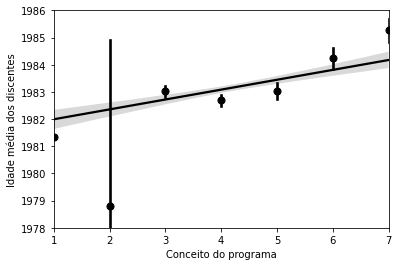

In [9]:
#relação entre idade e conceito

conceito=df.groupby('CD_PROGRAMA_IES').mean()['CD_CONCEITO_PROGRAMA']
idade=df.groupby('CD_PROGRAMA_IES').mean()['AN_NASCIMENTO_DISCENTE']
sns.regplot(conceito,idade,x_estimator=np.mean,color='black')
plt.xlabel('Conceito do programa')
plt.ylabel('Idade média dos discentes')
plt.ylim(1978,1986)

#não tem relação, não esperava por isso

In [10]:
df2 =df[df['QT_MES_TITULACAO']!=0]

#se a pessoa não estiver titulada o tempo vai estar igual a zero

/home/gustavo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(24.0, 48.0)

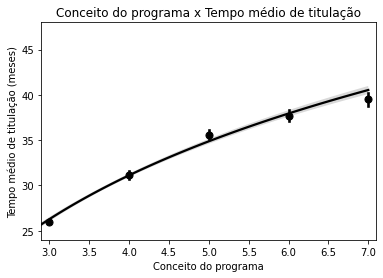

In [11]:
#tempo de titulação


conceito=df2.groupby('CD_PROGRAMA_IES').mean()['CD_CONCEITO_PROGRAMA']
tempo=df2.groupby('CD_PROGRAMA_IES').mean()['QT_MES_TITULACAO']
sns.regplot(conceito,tempo,x_estimator=np.mean,color='black',logx=True) #atenção ao logx=True
plt.xlabel('Conceito do programa')
plt.ylabel('Tempo médio de titulação (meses)')
plt.title('Conceito do programa x Tempo médio de titulação')
plt.xlim(2.9,7.1)
plt.ylim(24,48)